In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('input Copy.csv')
# check dataset structure
dataset.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Table 1.0: Original features datatypes
tbl_dataformat = []
for c in dataset.columns:
    tbl_dataformat.append([c,'Character' if dataset[c].dtype == 'object' else dataset[c].dtype])
print('Table 1.0: Original features datatypes \n')      
tbl_dataformat = pd.DataFrame(tbl_dataformat,columns=['Feature','Data type'])
print(tbl_dataformat)

Table 1.0: Original features datatypes 

                     Feature  Data type
0               encounter_id      int64
1                patient_nbr      int64
2                       race  Character
3                     gender  Character
4                        age  Character
5                     weight  Character
6          admission_type_id      int64
7   discharge_disposition_id      int64
8        admission_source_id      int64
9           time_in_hospital      int64
10                payer_code  Character
11         medical_specialty  Character
12        num_lab_procedures      int64
13            num_procedures      int64
14           num_medications      int64
15         number_outpatient      int64
16          number_emergency      int64
17          number_inpatient      int64
18                    diag_1  Character
19                    diag_2  Character
20                    diag_3  Character
21          number_diagnoses      int64
22             max_glu_serum  Character

In [4]:
for column_name in dataset.select_dtypes(exclude=['int64']).columns:
  print('\n Feature:{0} '.format(column_name))
  print(dataset[column_name].value_counts())


 Feature:race 
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

 Feature:gender 
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

 Feature:age 
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

 Feature:weight 
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

 Feature:payer_code 
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR       

In [5]:
X = dataset.copy()
tbl_feature_importance = []
tbl_feature_importance.append(['encounter_id',np.nan,'Rejected','Visit identifier, doest affect output'])
tbl_feature_importance.append(['patient_nbr',np.nan,'Rejected','Patient identifier, doest affect output'])
tbl_feature_importance.append(['payer_code',np.nan,'Rejected','Insurance company identifier, doest affect output'])
X.drop(columns=['encounter_id','patient_nbr','payer_code'],inplace=True)

In [6]:
# new code
# then drop features that have one and only one value.
#for c in X.columns:
   # if len(X[c].unique()) == 1:
    #    del X[c]
    #    print(' Feature ' + c.upper() + ' has one value & deleted from dataset')
     #   tbl1_feature_importance.append([c,np.nan,np.nan,'Rejected','Has a single unique value'])

In [7]:
#gender: Remove incorrect value
X = X[X['gender'] != 'Unknown/Invalid']
tbl_feature_importance.append(['gender',np.nan,'TBD',''])

#Age: Transform character text to corresponding average number
for i in range(0,10):
    X['age'] = X['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', np.average([10*i,10*(i+1)]))
tbl_feature_importance.append(['age',np.nan,'TBD',''])
X= X.astype({'age':'int64'})


Caucasian          76099
AfricanAmerican    19210
Other               4417
Hispanic            2037
Name: race, dtype: int64


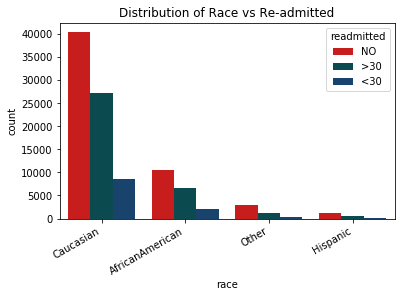

In [47]:

#replace incorrect values to be missing 
X["race"].replace('?',np.nan,inplace=True)
#fill missing values with value 'other' 
X['race'].fillna('Other',inplace=True)

# new code
encoding_feature = []
X['race'] = ['Other' if x not in ('Caucasian','AfricanAmerican','Hispanic') else x for x in X['race']]
print(X['race'].value_counts())
encoding_feature.append('race')

#plot race distribution after transforming 
sns.countplot(x='race',data=X,hue='readmitted',palette=sns.xkcd_palette(["red","deep teal", "twilight blue"])).set_title('Distribution of Race vs Re-admitted')
plt.gcf().autofmt_xdate()
plt.show()
tbl_feature_importance.append(['race',np.nan,'TBD',''])


Undefined    84745
8+            8216
Norm          4990
7+            3812
Name: A1Cresult, dtype: int64


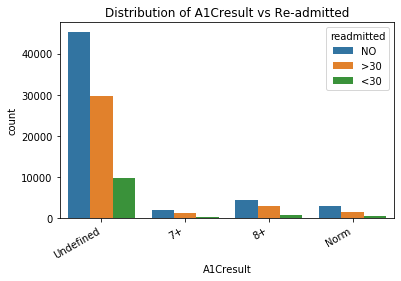

In [26]:
X["A1Cresult"].replace("None",'Undefined',inplace=True)
X["A1Cresult"].replace('>8','8+',inplace=True)
X["A1Cresult"].replace('>7','7+',inplace=True)
print(X['A1Cresult'].value_counts())
#plot race distribution after transforming 
sns.countplot(x='A1Cresult',data=X,hue='readmitted').set_title('Distribution of A1Cresult vs Re-admitted')
plt.gcf().autofmt_xdate()
plt.show()
tbl_feature_importance.append(['A1Cresult',np.nan,'TBD',''])

In [10]:
for col in ['diag_1','diag_2','diag_3']:
    print(X[col].value_counts()[:20])

428      6862
414      6580
786      4016
410      3614
486      3508
427      2766
491      2275
715      2151
682      2042
434      2028
780      2019
996      1967
276      1889
38       1688
250.8    1680
599      1595
584      1520
V57      1207
250.6    1183
518      1115
Name: diag_1, dtype: int64
276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2565
250.02    2074
707       1999
585       1871
584       1649
491       1545
250.01    1523
285       1520
780       1491
425       1434
682       1433
Name: diag_2, dtype: int64
250       11555
401        8288
276        5175
428        4577
427        3955
414        3664
496        2605
403        2357
585        1992
272        1969
599        1941
?          1423
V45        1389
250.02     1369
707        1360
780        1334
285        1200
425        1136
250.6      1080
424        1063
Name: diag_3, dtype: int64


In [11]:
#as feature 'max_glu_serum' has 95% missing values, we will drop it, also weight
X.drop(columns=['max_glu_serum','weight'],inplace=True)
tbl_feature_importance.append(['max_glu_serum',np.nan,'Rejected','95% missing values'])
tbl_feature_importance.append(['weight',np.nan,'Rejected','97% missing values'])

#as feature examide and citoglipton have only one value , we will drop them
X.drop(columns=['examide','citoglipton'],inplace=True)
tbl_feature_importance.append(['examide',np.nan,'Rejected','One value, doesnt affect output'])
tbl_feature_importance.append(['citoglipton',np.nan,'Rejected','One value, doesnt affect output'])

Other                     63673
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5351
Surgery-General            3099
Name: medical_specialty, dtype: int64


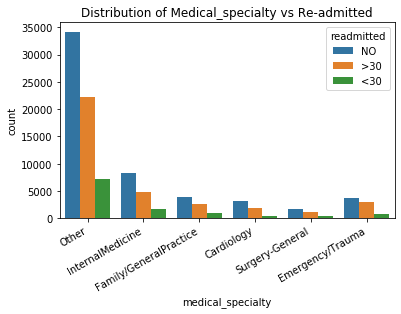

In [12]:
#check distinct values for feature 'medical_specialty'
X['medical_specialty'].value_counts()
#merge all low frequency values to be one value 'Other' 
X['medical_specialty'] = ['Other' if x not in ('InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General') else x for x in X['medical_specialty']]
print(X['medical_specialty'].value_counts())
sns.countplot(x='medical_specialty',data=X,hue='readmitted').set_title('Distribution of Medical_specialty vs Re-admitted')
plt.gcf().autofmt_xdate()
plt.show()
tbl_feature_importance.append(['medical_specialty',np.nan,'TBD',''])

In [13]:
X["readmitted"].replace('NO','>30',inplace=True)
X.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,6,25,1,1,Other,41,0,...,No,No,No,No,No,No,No,No,No,>30
1,Caucasian,Female,15,1,1,7,3,Other,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,25,1,1,7,2,Other,11,5,...,No,No,No,No,No,No,No,No,Yes,>30
3,Caucasian,Male,35,1,1,7,2,Other,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
4,Caucasian,Male,45,1,1,7,1,Other,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,>30


In [14]:
#print percentage of missing observation in categorical features
categorical_features = X.select_dtypes(exclude=['int64'])
for cat in categorical_features.columns:
    print('% of missing {} = {}  , values = {}'.format(cat,X[cat].isna().sum() / X.shape[0],X[cat].unique()))
   

% of missing race = 0.0  , values = ['Caucasian' 'AfricanAmerican' 'Other' 'Hispanic']
% of missing gender = 0.0  , values = ['Female' 'Male']
% of missing medical_specialty = 0.0  , values = ['Other' 'InternalMedicine' 'Family/GeneralPractice' 'Cardiology'
 'Surgery-General' 'Emergency/Trauma']
% of missing diag_1 = 0.0  , values = ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515'
 '780' '25

% of missing glipizide-metformin = 0.0  , values = ['No' 'Steady']
% of missing glimepiride-pioglitazone = 0.0  , values = ['No' 'Steady']
% of missing metformin-rosiglitazone = 0.0  , values = ['No' 'Steady']
% of missing metformin-pioglitazone = 0.0  , values = ['No' 'Steady']
% of missing change = 0.0  , values = ['No' 'Ch']
% of missing diabetesMed = 0.0  , values = ['No' 'Yes']
% of missing readmitted = 0.0  , values = ['>30' '<30']


In [15]:
# replace value '?' with value 'undefined'
X["diag_1"].replace('?','Undefined',inplace=True)
X["diag_2"].replace('?','Undefined',inplace=True)
X["diag_3"].replace('?','Undefined',inplace=True)

#new code
X['diag_1'] = [x[:3] for x in X['diag_1']]
print(X['diag_1'].value_counts().head(8))
X['diag_1'] = ['Other' if x not in ('250','766','414','682','410','296','577')  else x for x in X['diag_1']]
encoding_feature.append('diag_1')
tbl_feature_importance.append(['diag_1',np.nan,np.nan,'TBD',''])

#new code
X['diag_2'] = [x[:3] for x in X['diag_2']]
print(X['diag_2'].value_counts().head(8))
X['diag_2'] = ['Other' if x not in ('250','401','276','305') else x for x in X['diag_2']]
encoding_feature.append('diag_2')
tbl_feature_importance.append(['diag_2',np.nan,np.nan,'TBD',''])

#new code
X['diag_3'] = [x[:3] for x in X['diag_3']]
print(X['diag_3'].value_counts().head(8))
X['diag_3'] = ['Other' if x not in ('250','401','276','305') else x for x in X['diag_3']]
encoding_feature.append('diag_3')
tbl_feature_importance.append(['diag_3',np.nan,np.nan,'TBD',''])

In [16]:
#for features change and diabetesMed, we just tranform values to binary
X['change'] = [1 if x=='Ch' else 0 for x in X['change']]
X['diabetesMed'] = [1 if x=='Yes' else 0 for x in X['diabetesMed']]

In [17]:
#Again, print percentage of missing observation in numerical features
numerical_features = X.select_dtypes(include=['int64'])
for cat in numerical_features.columns:
    print('% of missing {} = {}'.format(cat,X[cat].isna().sum() / X.shape[0]))

% of missing age = 0.0
% of missing admission_type_id = 0.0
% of missing discharge_disposition_id = 0.0
% of missing admission_source_id = 0.0
% of missing time_in_hospital = 0.0
% of missing num_lab_procedures = 0.0
% of missing num_procedures = 0.0
% of missing num_medications = 0.0
% of missing number_outpatient = 0.0
% of missing number_emergency = 0.0
% of missing number_inpatient = 0.0
% of missing number_diagnoses = 0.0
% of missing change = 0.0
% of missing diabetesMed = 0.0


In [18]:
features_name = X.columns
lists = tbl_feature_importance.copy()
for f in features_name:
  for item in lists:
    if not (item[0] == f): 
      tbl_feature_importance.append([f,np.nan,'TBD',''])
      break;
len(tbl_feature_importance)

55

In [19]:
#per business expert recommendation, we delete following features since most of them don't have significant affect on re-admitted 
'''X = dataset.drop(['diag_1','diag_2', 'diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'], axis=1)

#print dataset after deleting unusful features
X.head(10)
for c in ['payer_code','diag_1','diag_2', 'diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']:
      tbl_feature_importance.append([c,np.nan,'TBD',''])
      #tbl_feature_importance.append([c,np.nan,'Rejected','Not useful- Business expert recomendation'])
#Correct datatype of features
X= X.astype({'payer_code':str,'admission_type_id':str,'discharge_disposition_id':str,'admission_source_id':str})
tbl_feature_importance.append(['admission_type_id',np.nan,'TBD',''])
tbl_feature_importance.append(['discharge_disposition_id',np.nan,'TBD',''])
tbl_feature_importance.append(['admission_source_id',np.nan,'TBD',''])
'''

"X = dataset.drop(['diag_1','diag_2', 'diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',\n       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',\n       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',\n       'tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin',\n       'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'], axis=1)\n\n#print dataset after deleting unusful features\nX.head(10)\nfor c in ['payer_code','diag_1','diag_2', 'diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',\n       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',\n       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',\n       'tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin',\n       'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']:

In [20]:
categorical_features = X.select_dtypes(exclude=['int64'])
del categorical_features['readmitted']
numerical_features = X.select_dtypes(include=['int64'])
print('Number of categorical features = {} ,Number of numerical features = {} '.format(categorical_features.shape[1],numerical_features.shape[1]))

Number of categorical features = 28 ,Number of numerical features = 14 


In [21]:
#Plot numeric features 
#sns.pairplot(X, hue="readmitted", palette="Set2", diag_kind="kde", height=2.5)
#plt.show()

In [22]:
#Check Collinear variale [correlated features]
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
if np.array(corr_features).size == 0:
    print('there is no correlated features')
else:
    print('Correlated features:')
    print(corr_features)
    for c in corr_features:
        tbl_feature_importance.append([c,np.nan,'Rejected','Correlated'])

there is no correlated features


In [23]:
X['readmitted'] = [1 if x == '<30' else 0 for x in X['readmitted']]

In [24]:
# categorical_features = X.select_dtypes(include=['object'])
# print(len(categorical_features.columns))
# for c in categorical_features.columns:
#     print(pd.get_dummies(X[c], prefix=c, drop_first=1))

In [25]:
# #Transform categorical features to numerical using onehotencoder
# categorical_features = X.select_dtypes(include=['object'])
# for c in categorical_features.columns:
#     X = pd.concat([X,pd.get_dummies(X[c], prefix=c, drop_first=1)],axis=1)
#     X.drop([c],axis=1, inplace=True)
# columns = X.columns
# columns2 = []
# for c in columns:
#   columns2.append(c.replace('<','less').replace('>','greater').replace('/','_'))
# X.columns = columns2  


In [26]:
#This function is used to change the diag_1 column data to required types
def diag_1_apply(data):
    if data=="":
        return "Other"
    else:
        row = int(data)
        if (row >= 390 and row <= 459) or row == 785:
            return "circulatory"
        elif row == 250:
            return "diabetes"
        elif (row >=520 and row <=579) or row ==787:
            return "digestive"
        elif (row >=580 and row <= 629) or row ==788:
            return "genitourinary"
        elif row >=800 and row <= 999:
            return "injury"
        elif row >=710 and row <= 739:
            return "musculoskeletal"
        elif row >=140 and row <= 239:
            return "neoplasms"
        elif row >=460 and row <= 519:
            return "respiratory"
        else:
            return "other"


In [27]:
# importing RegEx Module for finding th pattern
import re
# Finding all the numbers from the string in diag_1 column data and storing first 3 numbers
X['diag_1'] = [re.sub("\D", "", x)[:3]  for x in X['diag_1']]
# applying the diag_1_apply function to transform the data in diag_1
X['diag_1'] = X['diag_1'].apply(diag_1_apply)

In [28]:
# Transforming the diag_2 and diag_3 data
X['diag_2'] = [x if (x == '250' or x == '401' or x == '276' or x =='305') else "other" for x in X['diag_2']]
X['diag_3'] = [x if (x == '250' or x == '401' or x == '276' or x =='305') else "other" for x in X['diag_3']]

In [29]:
# Transforming all medication columns
list = ['metformin', 'repaglinide', 'nateglinide',
   'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
   'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
   'miglitol', 'troglitazone', 'tolazamide', 'insulin',
   'glyburide-metformin', 'glipizide-metformin',
   'glimepiride-pioglitazone', 'metformin-rosiglitazone',
   'metformin-pioglitazone']
for col in list:
    X[col] = [0 if x == 'No' else 1 for x in X[col] ]

In [30]:
tbl_dataformat = []
for c in X.columns:
    tbl_dataformat.append([c,'Character' if X[c].dtype == 'object' else X[c].dtype])
print('Table 1.0: Original features datatypes \n')      
tbl_dataformat = pd.DataFrame(tbl_dataformat,columns=['Feature','Data type'])
print(tbl_dataformat)

Table 1.0: Original features datatypes 

                     Feature  Data type
0                       race  Character
1                     gender  Character
2                        age      int64
3          admission_type_id      int64
4   discharge_disposition_id      int64
5        admission_source_id      int64
6           time_in_hospital      int64
7          medical_specialty  Character
8         num_lab_procedures      int64
9             num_procedures      int64
10           num_medications      int64
11         number_outpatient      int64
12          number_emergency      int64
13          number_inpatient      int64
14                    diag_1  Character
15                    diag_2  Character
16                    diag_3  Character
17          number_diagnoses      int64
18                 A1Cresult  Character
19                 metformin      int64
20               repaglinide      int64
21               nateglinide      int64
22            chlorpropamide      int64

In [31]:
# # removing outliers here
# from scipy import stats
# numerical_features = X.select_dtypes(include=['int64'])
# X = X[(np.abs(stats.zscore(numerical_features)) < 3).all(axis=1)]
# print(X.shape)


In [32]:
# #Transform categorical features to numerical using onehotencoder
# categorical_features = X.select_dtypes(include=['object'])
# total=0
# for c in categorical_features.columns:
#     total+=pd.get_dummies(X[c], prefix=c).shape[1]
#     print()
# #     X = pd.concat([X,pd.get_dummies(X[c], prefix=c, drop_first=1)],axis=1)
#     X = pd.concat([X,pd.get_dummies(X[c], prefix=c)],axis=1)
#     X.drop([c],axis=1, inplace=True)
# print("Total {} new columns are added in the dataset.\nFrom Columns :\n  {}\n".format(total,categorical_features.columns))
# columns = X.columns
# columns2 = []
# for c in columns:
#   columns2.append(c.replace('<','less').replace('>','greater').replace('/','_'))
# print("Created Columns are :\n")
# for item in columns2:
#     print(item)
# X.columns = columns2  

In [33]:
# This code block is for Ordinal encoding the categorical dataset from X
from sklearn.preprocessing import OrdinalEncoder as OE
categorical_features = X.select_dtypes(exclude=['int64'])
encoder = OE()
encoded = encoder.fit_transform(categorical_features)

encoded_data = pd.DataFrame(encoded,columns=categorical_features.columns)
print(encoded_data.head(15))
for col in categorical_features.columns:
    X[col] = encoded_data[col]

    race  gender  medical_specialty  diag_1  diag_2  diag_3  A1Cresult
0    1.0     0.0                4.0     2.0     4.0     4.0        3.0
1    1.0     0.0                4.0     8.0     4.0     4.0        3.0
2    0.0     0.0                4.0     8.0     0.0     4.0        3.0
3    1.0     1.0                4.0     8.0     4.0     4.0        3.0
4    1.0     1.0                4.0     7.0     4.0     0.0        3.0
5    1.0     1.0                4.0     1.0     4.0     0.0        3.0
6    1.0     1.0                4.0     1.0     4.0     4.0        3.0
7    1.0     1.0                4.0     1.0     4.0     0.0        3.0
8    1.0     0.0                4.0     1.0     4.0     4.0        3.0
9    1.0     0.0                3.0     1.0     4.0     4.0        3.0
10   0.0     0.0                4.0     2.0     4.0     4.0        3.0
11   0.0     1.0                4.0     7.0     4.0     4.0        3.0
12   1.0     0.0                2.0     1.0     4.0     4.0        3.0
13   1

In [34]:
# Dropping na values from X and setting Y euals to X readmitted column
X.dropna(inplace=True)
Y = X["readmitted"]
del X["readmitted"]

In [35]:
# printing Columns and there different values.
for col in X.columns:
    print('Column Name= {}  ,\n values = {}'.format(col,X[col].unique()))

Column Name= race  ,
 values = [1. 0. 3. 2.]
Column Name= gender  ,
 values = [0. 1.]
Column Name= age  ,
 values = [ 5 15 25 35 45 55 65 75 85 95]
Column Name= admission_type_id  ,
 values = [6 1 2 3 4 5 8 7]
Column Name= discharge_disposition_id  ,
 values = [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Column Name= admission_source_id  ,
 values = [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Column Name= time_in_hospital  ,
 values = [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Column Name= medical_specialty  ,
 values = [4. 3. 2. 0. 5. 1.]
Column Name= num_lab_procedures  ,
 values = [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  8

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=0)

In [38]:
# feature_importance_values = np.zeros(x_train.shape[1])
# from sklearn.ensemble import GradientBoostingClassifier
# n_iterations = 10
# for i in range(n_iterations):
#     classifier = GradientBoostingClassifier(n_estimators=50,verbose = 0)
#     classifier.fit(x_train, y_train)
#     # Record the feature importances
#     feature_importance_values += classifier.feature_importances_ / n_iterations

In [39]:
feature_importance_values = np.zeros(x_train.shape[1])
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100,verbose = 0)
classifier.fit(x_train, y_train)
feature_importance_values = classifier.feature_importances_

In [40]:
x_train.shape

(61056, 42)

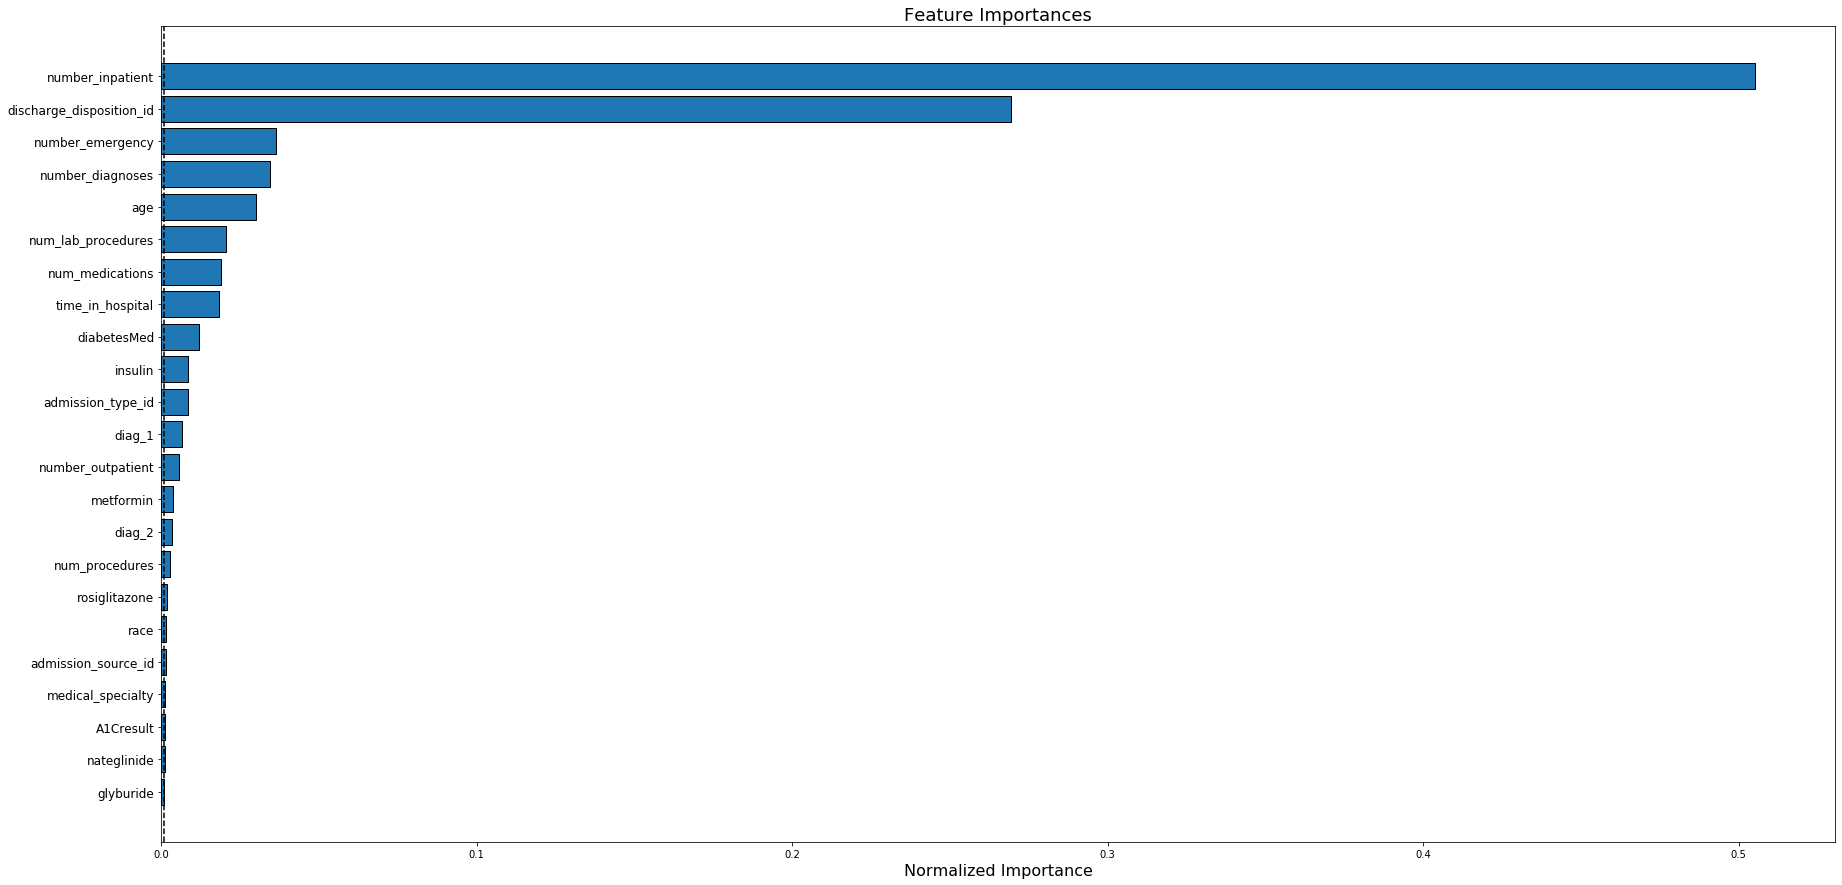

Selected features are: ['number_inpatient', 'discharge_disposition_id', 'number_emergency', 'number_diagnoses', 'age', 'num_lab_procedures', 'num_medications', 'time_in_hospital', 'diabetesMed', 'insulin', 'admission_type_id', 'diag_1', 'number_outpatient', 'metformin', 'diag_2', 'num_procedures', 'rosiglitazone', 'race', 'admission_source_id', 'medical_specialty', 'A1Cresult', 'nateglinide', 'glyburide']
Number of training set 61056 & Number of testing set 40704


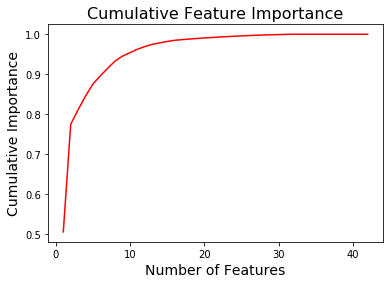

In [41]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': feature_importance_values})
# Sort features according to importance
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)
# Normalize the feature importances to add up to one
feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])
# Extract the features with zero importance
record_zero_importance = feature_importances[feature_importances['importance'] == 0.0] 
# print(feature_importances.head())
'''
for i,row in record_zero_importance.iterrows():
  for c in tbl_feature_importance:
    if row['feature'].startswith(c[0]):
      c[2] = 'Rejected'
      c[3] = 'Zero Importance'
'''
      
threshold = 0.001
n_features = feature_importances[feature_importances['importance'] > threshold].shape[0]
# n_features = 18
plt.figure(figsize = (30, 15))
ax = plt.subplot()
ax.barh([x for x in range(n_features,0,-1)], feature_importances['normalized_importance'][:n_features], align = 'center', edgecolor = 'k')


ax.set_yticks([x for x in range(n_features,0,-1)])
ax.set_yticklabels(feature_importances['feature'][:n_features], size = 12)

# Plot features importance
plt.axvline(x=threshold, color='k', linestyle='--')
plt.xlabel('Normalized Importance', size = 16)
plt.title('Feature Importances', size = 18)
plt.show()

# Plot cumulative importance rate
plt.figure(figsize = (6, 4))
plt.plot([x for x in range(1, len(feature_importances) + 1)], feature_importances['cumulative_importance'], 'r-')
plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14); 
plt.title('Cumulative Feature Importance', size = 16);

feature_importances_approved = feature_importances.loc[feature_importances['importance'] > threshold,:].sort_values('importance', ascending = False).reset_index(drop = True)
selected_features = ','.join([str(x) for x in feature_importances_approved['feature'][:min(n_features,feature_importances_approved.shape[0])]]).split(',')
print('Selected features are: {}'.format(selected_features))
x_train = x_train[selected_features]
x_test = x_test[selected_features]
print('Number of training set {} & Number of testing set {}'.format(x_train.shape[0],x_test.shape[0]))


Selected features are: ['number_inpatient', 'discharge_disposition_id', 'number_emergency', 'number_diagnoses', 'age', 'num_lab_procedures', 'num_medications', 'time_in_hospital', 'diabetesMed', 'insulin', 'admission_type_id', 'diag_1', 'number_outpatient', 'metformin', 'diag_2', 'num_procedures', 'rosiglitazone', 'race', 'admission_source_id', 'medical_specialty', 'A1Cresult', 'nateglinide', 'glyburide']
Number of training set 61056 & Number of testing set 40704


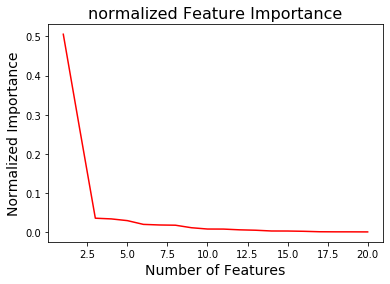

In [42]:
# Plot cumulative importance rate
plt.figure(figsize = (6, 4))
plt.plot([x for x in range(1,20 + 1)], feature_importances['normalized_importance'][0:20], 'r-')
plt.xlabel('Number of Features', size = 14); plt.ylabel('Normalized Importance', size = 14); 
plt.title('normalized Feature Importance', size = 16);

feature_importances_approved = feature_importances.loc[feature_importances['importance'] > threshold,:].sort_values('importance', ascending = False).reset_index(drop = True)
selected_features = ','.join([str(x) for x in feature_importances_approved['feature'][:min(n_features,feature_importances_approved.shape[0])]]).split(',')
print('Selected features are: {}'.format(selected_features))
x_train = x_train[selected_features]
x_test = x_test[selected_features]
print('Number of training set {} & Number of testing set {}'.format(x_train.shape[0],x_test.shape[0]))

In [43]:
# Table 1.1: features datatypes after cleansing & Transformation
tbl_dataformat2 = []
for c in X.columns:
    tbl_dataformat2.append([c,'Character' if X[c].dtype == 'object' else X[c].dtype])
print('Table 1.0: Original features datatypes \n')
tbl_dataformat2 = pd.DataFrame(tbl_dataformat2,columns=['Feature','Data type'])
print(tbl_dataformat2)

Table 1.0: Original features datatypes 

                     Feature Data type
0                       race   float64
1                     gender   float64
2                        age     int64
3          admission_type_id     int64
4   discharge_disposition_id     int64
5        admission_source_id     int64
6           time_in_hospital     int64
7          medical_specialty   float64
8         num_lab_procedures     int64
9             num_procedures     int64
10           num_medications     int64
11         number_outpatient     int64
12          number_emergency     int64
13          number_inpatient     int64
14                    diag_1   float64
15                    diag_2   float64
16                    diag_3   float64
17          number_diagnoses     int64
18                 A1Cresult   float64
19                 metformin     int64
20               repaglinide     int64
21               nateglinide     int64
22            chlorpropamide     int64
23               glimep

In [44]:
tbl_feature_importance = pd.DataFrame(tbl_feature_importance, columns=['Feature','Importance(avg)','Decision','Comment'])
for i,row in tbl_feature_importance.iterrows():
    for j,importance in record_zero_importance.iterrows():
        if (row['Feature'] in importance['feature']) & (row['Decision'] != 'Confirmed'): 
            tbl_feature_importance.at[i,'Importance(avg)'] = 0
            tbl_feature_importance.at[i,'Decision'] = 'Rejected'
            tbl_feature_importance.at[i,'Comment'] = 'Zero importance'
min_selected_importance = feature_importances.loc[n_features,'importance']
for i,row in tbl_feature_importance.iterrows():
    found = 0
    for j,importance in feature_importances.iterrows():        
        if (row['Feature'] in importance['feature']) & (row['Decision'] != 'Confirmed'): 
            tbl_feature_importance.at[i,'Importance(avg)'] = importance['importance']
            tbl_feature_importance.at[i,'Decision'] = 'Confirmed' if importance['importance'] > min_selected_importance else 'Rejected'
            tbl_feature_importance.at[i,'Comment'] = '' if importance['importance'] > min_selected_importance else 'Less than threshold ' + str(round(min_selected_importance,5))
            #print ('F:{} , imp:{} = {}  status{}'.format(row['Feature'],importance['feature'],importance['importance'],tbl_feature_importance.at[i,'Decision']))
            found = 1
            break
# Table 1.3: features importance
print('\nTable 1.3: Original features datatypes\n')
print(tbl_feature_importance.to_string(index=False))


Table 1.3: Original features datatypes

                  Feature  Importance(avg)   Decision                                            Comment
             encounter_id              NaN   Rejected              Visit identifier, doest affect output
              patient_nbr              NaN   Rejected            Patient identifier, doest affect output
               payer_code              NaN   Rejected  Insurance company identifier, doest affect output
                   gender         0.000541   Rejected                        Less than threshold 0.00093
                      age         0.030060  Confirmed                                                   
                     race         0.001481  Confirmed                                                   
                A1Cresult         0.001165  Confirmed                                                   
            max_glu_serum              NaN   Rejected                                 95% missing values
              

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=0)
x_train = x_train[selected_features]
x_test = x_test[selected_features]
print('Sample counts \nOriginal = {}'.format(dataset.shape[0]))
print('Cleansed & transformed = {}'.format(X.shape[0]))
print('Training = {}'.format(x_train.shape[0]))
print('Testing = {}'.format(x_test.shape[0]))

Sample counts 
Original = 101766
Cleansed & transformed = 101760
Training = 61056
Testing = 40704


Algorith:DecisionTree , Accuracy:0.7978577044025157 , precision:0.15591498965582096 , log_loss:6.981835710755498 , recall_score:0.18144014007441453 , f1_score:0.16771191584058262


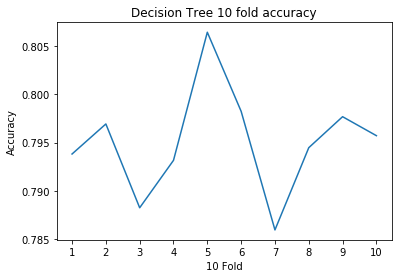

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,log_loss,f1_score
model_result = []
model_accuracy = []
model_accuracy_10fold = pd.DataFrame()
# Applying the first algorithm [CART] and check accuracy.
#1. CART
from sklearn.tree import DecisionTreeClassifier,export_graphviz
classifier = DecisionTreeClassifier(random_state =0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
model_result.append(['DecisionTree',accuracy_score(y_test, y_pred),\
                     precision_score(y_test, y_pred),
                     log_loss(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     f1_score(y_test, y_pred)])
print('Algorith:{} , Accuracy:{} , precision:{} , log_loss:{} , recall_score:{} , f1_score:{}'.format(model_result[-1][0],model_result[-1][1],model_result[-1][2],model_result[-1][3],model_result[-1][4],model_result[-1][5]))
accuracies = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv = 10)
model_accuracy.append(['DecisionTree',accuracies.min(),accuracies.max(),accuracies.mean()])
model_accuracy_10fold['DecisionTree'] = accuracies

x_range = [x for x in range(1,11)]
ax = sns.lineplot(x=x_range,y=accuracies,markers=True, dashes=False)
ax.set_xticks(x_range)
ax.set_title('Decision Tree 10 fold accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('10 Fold')
plt.show();

In [47]:
#As we see accuracy is fine 79% but Recall is very low 16%
# we will check model overfitting or underfitting
# test prediction accuracy on training data  
y_pred = classifier.predict(x_train)
cm = confusion_matrix(y_train, y_pred)  
print('accuracy_score : {}'.format(accuracy_score(y_train, y_pred)))
print('recall_score : {}'.format(recall_score(y_train, y_pred)))

accuracy_score : 0.9999836215932913
recall_score : 0.9998526812021213


In [47]:
# this is what we expect, model is overfitting, we need to balance data then test again
# check data balancing
from imblearn.over_sampling import SMOTE
print('Original dataset shape {}'.format(Counter(y_train)))
smt = SMOTE(random_state=0)
X_balanced, Y_balanced = smt.fit_sample(X, Y)
X_balanced = pd.DataFrame(X_balanced,columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size=0.40, random_state=0)
x_train = x_train[selected_features]
x_test = x_test[selected_features]
print('New dataset shape {}'.format(Counter(y_train)))

Using TensorFlow backend.


Original dataset shape Counter({0: 54251, 1: 6806})
New dataset shape Counter({0: 54517, 1: 53970})


Algorith:DecisionTree , Accuracy:0.7945385413066022 , precision:0.7780555698747358 , log_loss:7.09648257949318 , recall_score:0.8284937973432869 , f1_score:0.8024829199564026


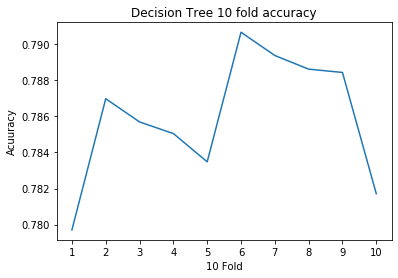

In [48]:
# Fine, Data become balanced Now we need to apply the same algorithm and check accuracy vs recall 
#1. CART
classifier = DecisionTreeClassifier(random_state =0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
model_result.append(['DecisionTree',accuracy_score(y_test, y_pred),\
                     precision_score(y_test, y_pred),
                     log_loss(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     f1_score(y_test, y_pred)])
print('Algorith:{} , Accuracy:{} , precision:{} , log_loss:{} , recall_score:{} , f1_score:{}'.format(model_result[-1][0],model_result[-1][1],model_result[-1][2],model_result[-1][3],model_result[-1][4],model_result[-1][5]))
accuracies = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv = 10)
model_accuracy.append(['DecisionTree',accuracies.min(),accuracies.max(),accuracies.mean()])
model_accuracy_10fold['DecisionTree'] = accuracies

x_range = [x for x in range(1,11)]
ax = sns.lineplot(x=x_range,y=accuracies,markers=True, dashes=False)
ax.set_xticks(x_range)
ax.set_title('Decision Tree 10 fold accuracy')
ax.set_ylabel('Acuuracy')
ax.set_xlabel('10 Fold')
plt.show();

In [49]:
# Good we have a good accuracy and recall as well
# this time to choose optimum hyperparameters to get a better result

parameters={'criterion':['gini','entropy'],'splitter':['best','random'],
            'max_depth': range(1,20,1),  'min_samples_split' : range(10,500,20)}

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search = grid_search.fit(x_train, y_train)
print('best_accuracy = {}'.format(grid_search.best_score_))
print('best_parameters = {}'.format(grid_search.best_params_))

In [ ]:
# Again we will test CART algorith with a new hyperparameters that we got
model_result = []
model_accuracy = []
model_accuracy_10fold = pd.DataFrame()
#1. CART
classifier = DecisionTreeClassifier(criterion= 'gini',max_depth=11,  min_samples_split=50, splitter='best',random_state =0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
model_result.append(['DecisionTree',accuracy_score(y_test, y_pred),\
                     precision_score(y_test, y_pred),
                     log_loss(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     f1_score(y_test, y_pred)])
print('Algorith:{} , Accuracy:{} , precision:{} , log_loss:{} , recall_score:{} , f1_score:{}'.format(model_result[-1][0],model_result[-1][1],model_result[-1][2],model_result[-1][3],model_result[-1][4],model_result[-1][5]))
accuracies = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv = 10)
model_accuracy.append(['DecisionTree',accuracies.min(),accuracies.max(),accuracies.mean()])
model_accuracy_10fold['DecisionTree'] = accuracies

x_range = [x for x in range(1,11)]
ax = sns.lineplot(x=x_range,y=accuracies,markers=True, dashes=False)
ax.set_xticks(x_range)
ax.set_title('Decision Tree 10 fold accuracy')
ax.set_ylabel('Acuuracy')
ax.set_xlabel('10 Fold')
plt.show();

Algorith:LogisticRegression , Accuracy:0.8878242924528302 , precision:0.512396694214876 , log_loss:3.8744128389202674 , recall_score:0.0135697089078573 , f1_score:0.026439232409381667


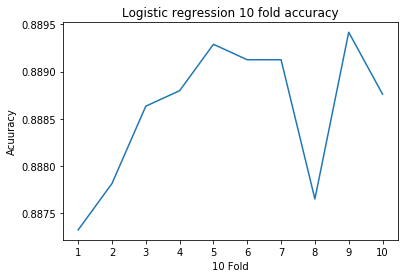

In [48]:
# 2 Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,C=50,fit_intercept=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
model_result.append(['LogisticRegression',accuracy_score(y_test, y_pred),\
                     precision_score(y_test, y_pred),
                     log_loss(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     f1_score(y_test, y_pred)])
print('Algorith:{} , Accuracy:{} , precision:{} , log_loss:{} , recall_score:{} , f1_score:{}'.format(model_result[-1][0],model_result[-1][1],model_result[-1][2],model_result[-1][3],model_result[-1][4],model_result[-1][5]))
accuracies = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv = 10)
model_accuracy.append(['LogisticRegression',accuracies.min(),accuracies.max(),accuracies.mean()])
model_accuracy_10fold['LogisticRegression'] = accuracies

x_range = [x for x in range(1,11)]
ax = sns.lineplot(x=x_range,y=accuracies,markers=True, dashes=False)
ax.set_xticks(x_range)
ax.set_title('Logistic regression 10 fold accuracy')
ax.set_ylabel('Acuuracy')
ax.set_xlabel('10 Fold')
plt.show();


In [ ]:
parameters = {'C': [1, 2, 3, 5,10,20,30,40,50,100,200,300,500], 'fit_intercept': [True , False]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
print('best_accuracy:{}'.format(grid_search.best_score_))
print('best_parameters:{}'.format(grid_search.best_params_))

In [49]:
#Scale data
x_train_columns = x_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test) 

Algorith:Multi- layer perception , Accuracy:0.8877505896226415 , precision:0.0 , log_loss:3.876957285484152 , recall_score:0.0 , f1_score:0.0


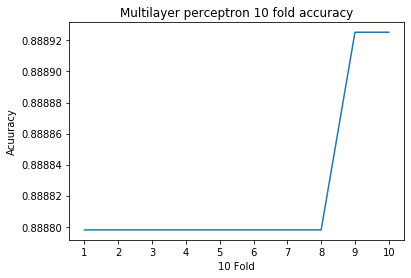

In [50]:
#Multilayer perceptron
from sklearn.neural_network import MLPClassifier
number_neurons_in_layer = 5
classifier = MLPClassifier(hidden_layer_sizes=(number_neurons_in_layer,2), max_iter=500, alpha=0.01,
                     solver='sgd', verbose=0,  random_state=0,tol=0.000000001)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
model_result.append(['Multi- layer perception',accuracy_score(y_test, y_pred),\
                     precision_score(y_test, y_pred),
                     log_loss(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     f1_score(y_test, y_pred)])
print('Algorith:{} , Accuracy:{} , precision:{} , log_loss:{} , recall_score:{} , f1_score:{}'.format(model_result[-1][0],model_result[-1][1],model_result[-1][2],model_result[-1][3],model_result[-1][4],model_result[-1][5]))
accuracies = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()
model_accuracy.append(['Multilayer perceptron',accuracies.min(),accuracies.max(),accuracies.mean()])
model_accuracy_10fold['Multilayer perceptron'] = accuracies

x_range = [x for x in range(1,11)]
ax = sns.lineplot(x=x_range,y=accuracies,markers=True, dashes=False)
ax.set_xticks(x_range)
ax.set_title('Multilayer perceptron 10 fold accuracy')
ax.set_ylabel('Acuuracy')
ax.set_xlabel('10 Fold')
plt.show()

In [51]:
number_neurons_in_layer = 5
x_train_columns_count = len(x_train_columns)
hidden_columns = np.array([])
for i in np.arange(1,number_neurons_in_layer+1):
    hidden_columns = np.append(hidden_columns,'Hidden2.'+str(i))

hidden_columns = np.concatenate((np.array(hidden_columns) , np.array(['readmitted<30','readmitted>30'])), axis=0)
row_index = np.concatenate((np.array(x_train_columns),np.array(hidden_columns[:])), axis=0)

mlp_weight = pd.DataFrame(columns=hidden_columns)
mlp_weight[hidden_columns[0]] = np.arange(1,len(row_index)-1)
mlp_weight = pd.DataFrame(mlp_weight.iloc[:,:].values,columns=mlp_weight.columns,index=row_index[:-2])

col_index = 0
for row_index in np.arange(number_neurons_in_layer): 
    mlp_weight.iloc[0:x_train_columns_count,col_index] = classifier.coefs_[0][:,row_index]
    col_index = col_index+1


mlp_weight.iloc[x_train_columns_count:x_train_columns_count+number_neurons_in_layer,-2] = classifier.coefs_[1][:,0]
mlp_weight.iloc[x_train_columns_count:x_train_columns_count+number_neurons_in_layer,-1] = classifier.coefs_[1][:,1]

mlp_weight.fillna(0,inplace=True)

# Table: Weight matrix of MLP
print('\nTable: Weight matrix of MLP\n')
print(mlp_weight.to_string(index=True))




Table: Weight matrix of MLP

                          Hidden2.1  Hidden2.2  Hidden2.3  Hidden2.4  Hidden2.5  readmitted<30  readmitted>30
number_inpatient          -0.092917  -0.577346   0.060443   0.601364  -0.357239       0.000000       0.000000
discharge_disposition_id   0.289305  -0.213486   0.345855   0.248613  -0.178939       0.000000       0.000000
number_emergency           0.384385  -0.239050   0.024929   0.338258  -0.381641       0.000000       0.000000
number_diagnoses           0.022878  -0.251759   0.276086  -0.199917   0.413080       0.000000       0.000000
age                        0.286226  -0.183842  -0.016930  -0.051829  -0.338915       0.000000       0.000000
num_lab_procedures         0.452394  -0.121118   0.357010   0.003621   0.057203       0.000000       0.000000
num_medications           -0.203889   0.086977  -0.061036   0.009459  -0.527297       0.000000       0.000000
time_in_hospital           0.239628  -0.259513  -0.004872   0.019765   0.234827       0.00

No handles with labels found to put in legend.


Table 1. Model Accuracy

                 Algorithm  accuracy  precision  log_loss   recall  f1_score
0             DecisionTree  0.797858   0.155915  6.981836  0.18144  0.167712
1       LogisticRegression  0.887824   0.512397  3.874413  0.01357  0.026439
2  Multi- layer perception  0.887751   0.000000  3.876957  0.00000  0.000000



Table 2. Model Avg. Accuracy

               Algorithm       Min       Max      Mean
0           DecisionTree  0.785948  0.806420  0.795057
1     LogisticRegression  0.887324  0.889417  0.888594
2  Multilayer perceptron  0.888798  0.888925  0.888823



Table 3. Model Accuracy 10-fold

       CART  Logistic Reg.       MLP
0  0.793809       0.887324  0.888798
1  0.796921       0.887815  0.888798
2  0.788241       0.888634  0.888798
3  0.793154       0.888798  0.888798
4  0.806420       0.889289  0.888798
5  0.798231       0.889125  0.888798
6  0.785948       0.889125  0.888798
7  0.794464       0.887651  0.888798
8  0.797674       0.889417  0.888925
9  0.795

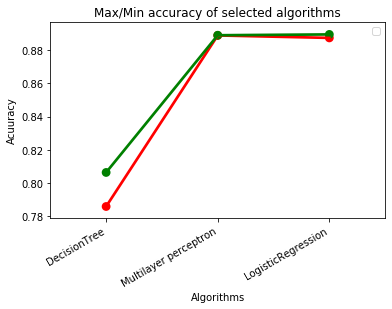

In [52]:
#Plot final result 
dfmodel_result = pd.DataFrame(model_result,columns=['Algorithm','accuracy','precision','log_loss','recall','f1_score'])
dfmodel_accuracy = pd.DataFrame(model_accuracy,columns=['Algorithm','Min','Max','Mean'])
print('Table 1. Model Accuracy\n')
print(dfmodel_result.to_string(index=True))
print('\n\n')
print('Table 2. Model Avg. Accuracy\n')
print(dfmodel_accuracy.to_string(index=True))
print('\n\n')
print('Table 3. Model Accuracy 10-fold\n')
m= model_accuracy_10fold.rename(columns={'DecisionTree':'CART','LogisticRegression':'Logistic Reg.','Multilayer perceptron':'MLP' , 'GradientBoostingClassifier':'GradientBoosting'})
print(m.to_string(index=True))
print('\n\n')
dfmodel_accuracy.sort_values(by='Max',inplace=True)
best_algorithm = dfmodel_accuracy.loc[dfmodel_accuracy['Max'] == dfmodel_accuracy['Max'].max(),'Algorithm'].values[0]
ax = sns.pointplot(x='Algorithm',y='Min',color='red',data=dfmodel_accuracy,label="Min", linestyle="-")
ax = sns.pointplot(x='Algorithm',y='Max',color = 'green',data=dfmodel_accuracy,label="Max", linestyle="-")
ax.set_title('Max/Min accuracy of selected algorithms')
ax.set_ylabel('Acuuracy')
ax.set_xlabel('Algorithms')
ax.legend()
plt.gcf().autofmt_xdate()
plt.show()